In [1]:
from keras.datasets import cifar10

#comentar
#from keras.utils import np_utils
#adicionar
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

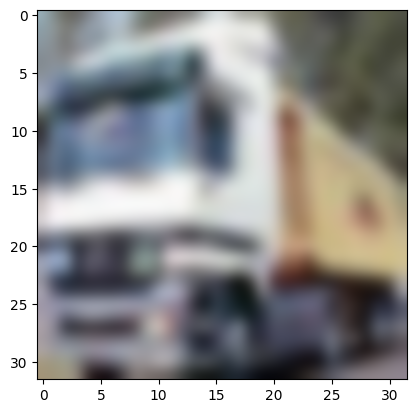

In [3]:
image = X_train[1]
plt.imshow(image, interpolation='bicubic')
plt.show()

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [10]:
modelo = Sequential()

modelo.add(Conv2D(32,(3,3), padding='same',activation='relu')) #, input_shape=(32,32,3)))
modelo.add(Conv2D(32,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64,(3,3), padding='same',activation='relu'))
modelo.add(Conv2D(64,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(10, activation='softmax'))

In [11]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3754 - loss: 1.6925
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6220 - loss: 1.0608
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6968 - loss: 0.8633
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7335 - loss: 0.7536
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7546 - loss: 0.6921
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7756 - loss: 0.6264
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7990 - loss: 0.5740
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8113 - loss: 0.5259
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8231 - loss: 0.4980
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8360 - loss: 0.4638
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8461 - loss: 0.4415
Epoch 12/100
15

In [12]:
previsoes = modelo.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [13]:
previsoes

array([[1.21748716e-01, 2.34297346e-02, 8.44392634e-04, ...,
        2.21804790e-02, 4.23704475e-01, 1.82808831e-01],
       [7.76301313e-04, 1.36703923e-01, 4.17748687e-14, ...,
        1.36455473e-15, 8.62480581e-01, 3.91306894e-05],
       [2.67319358e-03, 2.15925694e-01, 1.13458626e-07, ...,
        2.07232219e-07, 7.25604773e-01, 5.57820313e-02],
       ...,
       [8.36346780e-14, 1.96603194e-12, 2.34218405e-07, ...,
        1.71455845e-08, 1.47642142e-12, 2.10131370e-12],
       [1.88026146e-08, 9.99990940e-01, 8.11592304e-09, ...,
        9.47794399e-10, 3.78916902e-14, 6.11342421e-06],
       [3.44031000e-22, 6.72259848e-24, 1.55827289e-20, ...,
        1.00000000e+00, 4.21709559e-25, 9.56009487e-25]], dtype=float32)

In [14]:
previsoes_classes = np.argmax(previsoes, axis=1)
previsoes_classes

array([8, 8, 8, ..., 5, 1, 7])

In [15]:
y_test_classes = np.argmax(y_test, axis = 1)

In [16]:
y_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [17]:
accuracy = accuracy_score(y_test_classes,previsoes_classes)
accuracy

0.7832

In [18]:
confusion = confusion_matrix(y_test_classes,previsoes_classes)

In [19]:
confusion

array([[827,  15,  39,  12,  18,   7,   5,  12,  39,  26],
       [ 11, 909,   3,   3,   1,   3,   4,   1,  16,  49],
       [ 63,   5, 640,  47,  94,  59,  64,  16,   9,   3],
       [ 23,   6,  44, 562,  75, 174,  63,  25,  12,  16],
       [ 13,   4,  37,  37, 791,  30,  39,  41,   5,   3],
       [  9,   8,  29, 126,  41, 729,  28,  26,   1,   3],
       [  6,   2,  16,  43,  34,  20, 866,   5,   5,   3],
       [ 10,   4,  23,  25,  67,  50,   8, 803,   1,   9],
       [ 67,  27,   6,   9,   7,   3,  12,   7, 844,  18],
       [ 22,  63,   3,  11,   7,   5,   2,   3,  23, 861]])